# Linear Regression Examples

In this notebook I itterate through different ways to perform linear regression.

We first begin by loading the data

In [87]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [89]:
salary_data = pd.read_csv('salary_data.csv')
# stolen from: https://towardsdatascience.com/machine-learning-simple-linear-regression-with-python-f04ecfdadc13

In [90]:
salary_data = salary_data.values # creating x data matrix and response y
print(salary_data)
x = salary_data[:, 0:1]
y = salary_data[:, 1:2]

[[1.10000e+00 3.93430e+04]
 [1.30000e+00 4.62050e+04]
 [1.50000e+00 3.77310e+04]
 [2.00000e+00 4.35250e+04]
 [2.20000e+00 3.98910e+04]
 [2.90000e+00 5.66420e+04]
 [3.00000e+00 6.01500e+04]
 [3.20000e+00 5.44450e+04]
 [3.20000e+00 6.44450e+04]
 [3.70000e+00 5.71890e+04]
 [3.90000e+00 6.32180e+04]
 [4.00000e+00 5.57940e+04]
 [4.00000e+00 5.69570e+04]
 [4.10000e+00 5.70810e+04]
 [4.50000e+00 6.11110e+04]
 [4.90000e+00 6.79380e+04]
 [5.10000e+00 6.60290e+04]
 [5.30000e+00 8.30880e+04]
 [5.90000e+00 8.13630e+04]
 [6.00000e+00 9.39400e+04]
 [6.80000e+00 9.17380e+04]
 [7.10000e+00 9.82730e+04]
 [7.90000e+00 1.01302e+05]
 [8.20000e+00 1.13812e+05]
 [8.70000e+00 1.09431e+05]
 [9.00000e+00 1.05582e+05]
 [9.50000e+00 1.16969e+05]
 [9.60000e+00 1.12635e+05]
 [1.03000e+01 1.22391e+05]
 [1.05000e+01 1.21872e+05]]


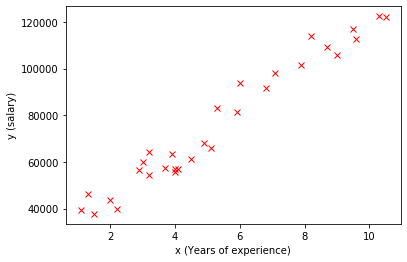

In [91]:
plt.plot(x, y, 'rx') # plot the data and see what it looks like
plt.ylabel("y (salary)")
plt.xlabel("x (Years of experience)")
plt.show()

## Using Linear Algebra

$\beta$ is defined as;

$$\mathbf{\beta} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}$$

and is the solution to the simple linear regression problem

In [92]:
X = np.hstack((np.ones_like(x), x))
w = np.linalg.solve(np.matmul(X.T,X), np.matmul(X.T,y)) # finding beta
w1, w2 = w

In [93]:
x_test = [5.7, 6.6, 7.8, 9.9]
x_test = np.array(x_test)
predictions = np.array(w1 + w2*x_test) # making predictions

In [94]:
predictions.reshape(-1,1) # reshape

array([[ 79656.98543096],
       [ 88161.95152027],
       [ 99501.90630602],
       [119346.82718107]])

## Using Sci-kit Learn

In [95]:
from sklearn.linear_model import LinearRegression # import linear regression from sci-kit learn
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
print(lr.intercept_, w1) # checking the intercept is the same

[25792.20019867] [25792.20019867]


In [97]:
print(lr.coef_, w2) # checking beta1 is the same

[[9449.96232146]] [9449.96232146]


In [98]:
x_test = x_test.reshape(-1,1)

In [99]:
lr.predict(x_test) # making predictions

array([[ 79656.98543096],
       [ 88161.95152027],
       [ 99501.90630602],
       [119346.82718107]])